### Chapter 13: Statistics
* populations denoted by capital letters (X)
* sample groups denote by lowercase letters (x)
* population variance: 1/N * sum(xi - u)^2
* sample variance: 1/(n-1) * sum(xi - ux)^2 <== n-1 because one degree of freedom eliminated.

## Imports

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import random
import seaborn as sns

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
sns.set(style="whitegrid")

### Descriptive statistics

In [4]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [5]:
np.mean(x), np.median(x), x.min(), x.max()

(3.1000000000000001, 3.0, 0.90000000000000002, 6.7000000000000002)

In [6]:
x.var(), x.std()

(3.0700000000000007, 1.7521415467935233)

In [7]:
# ddof = delta degrees of freedom
x.var(ddof=1), x.std(ddof=1)

(3.5085714285714293, 1.8731181032095732)

### Random numbers
* np.random.rand() returns uniform distribution [0,1]

In [8]:
random.seed(123456789)

In [9]:
random.random()

0.6414006161858726

In [10]:
random.randint(0, 10)  # 0 and 10 inclusive

8

In [11]:
np.random.seed(123456789)

In [12]:
np.random.rand()

0.532833024789759

In [13]:
# normal distribution
np.random.randn()

0.8768342101492541

In [14]:
np.random.rand(5)

array([ 0.71356403,  0.25699895,  0.75269361,  0.88387918,  0.15489908])

In [15]:
np.random.randn(2, 4)

array([[ 3.13325952,  1.15727052,  1.37591514,  0.94302846],
       [ 0.8478706 ,  0.52969142, -0.56940469,  0.83180456]])

In [16]:
np.random.randint(10, size=10)

array([0, 3, 8, 3, 9, 0, 6, 9, 2, 7])

In [17]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[12, 18, 18, 17, 14, 12, 14, 10, 16, 19],
       [15, 13, 15, 18, 11, 17, 17, 10, 13, 17]])

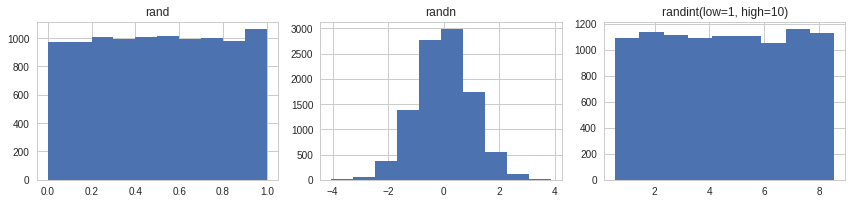

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()
fig.savefig("ch13-random-hist.pdf")

In [19]:
#random.sample(range(10), 5)

In [20]:
# generate unique list of integers w/o replacement
np.random.choice(10, 5, replace=False)

array([9, 0, 5, 8, 1])

In [21]:
# seed sets to generator to known state - so it can generate same sequence
np.random.seed(123456789)

In [22]:
np.random.rand()

0.532833024789759

In [23]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [24]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [25]:
# you can create multiple initial states for a generator
prng = np.random.RandomState(123456789)

* rand, chi-squared, student's-T, F, discrete binomial, poisson support

In [26]:
prng.rand(2, 4)

array([[ 0.53283302,  0.5341366 ,  0.50955304,  0.71356403],
       [ 0.25699895,  0.75269361,  0.88387918,  0.15489908]])

In [27]:
prng.chisquare(1, size=(2, 2))

array([[  1.00418922e+00,   1.26859720e+00],
       [  2.02731988e+00,   2.52605129e-05]])

In [28]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [29]:
prng.f(5, 2, size=(2, 4))

array([[  0.77372119,   0.1213796 ,   1.64779052,   1.21399831],
       [  0.45471421,  17.64891848,   1.48620557,   2.55433261]])

In [30]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [31]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

### Probability distributions and random variables in SciPy.stats
![pic](pics/random-var-funcs.png)

In [32]:
# example: normal distribution
np.random.seed(123456789)
X = stats.norm(1, 0.5)

In [33]:
X.mean(), X.median(), X.std(), X.var()

(1.0, 1.0, 0.5, 0.25)

In [34]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [35]:
X.stats()

(array(1.0), array(0.25))

In [36]:
# prob distribution
X.pdf([0, 1, 2])

array([ 0.10798193,  0.79788456,  0.10798193])

In [37]:
# cume distribution
X.cdf([0, 1, 2])

array([ 0.02275013,  0.5       ,  0.97724987])

In [38]:
# rndm variable samples
X.rvs(10)

array([ 2.106451  ,  2.0641989 ,  1.9208557 ,  1.04119124,  1.42948184,
        0.58699179,  1.57863526,  1.68795757,  1.47151423,  1.4239353 ])

In [39]:
# survival function
X.sf(2)

0.022750131948179195

In [40]:
# alternative example method
stats.norm(1, 0.5).stats()

(array(1.0), array(0.25))

In [41]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.0), array(0.25))

In [42]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [43]:
X.interval(0.99)

(-0.28791465177445019, 2.2879146517744502)

In [44]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

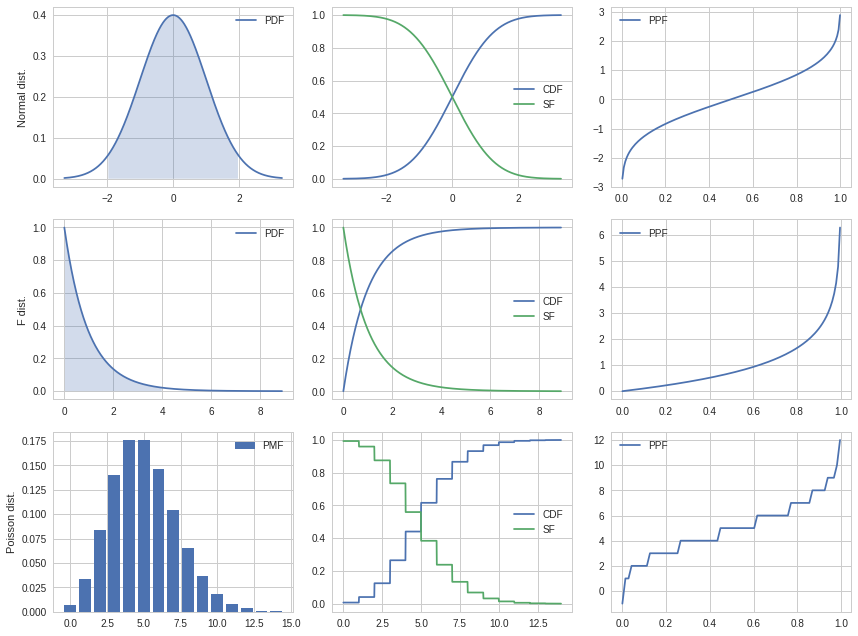

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()
fig.savefig("ch13-distributions.pdf")

In [46]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

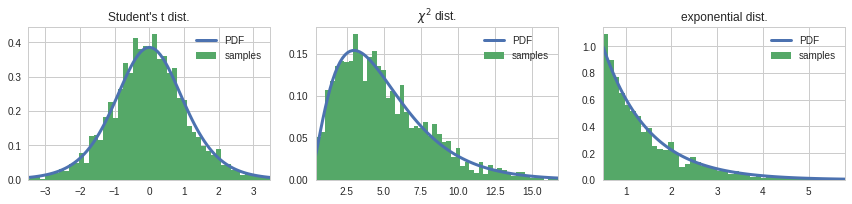

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()
fig.savefig("ch13-dist-sample.pdf")

In [48]:
# another use case:
# fit known distribution with unknown params to given dataset using fit()

X = stats.chi2(df=5)
X_samples = X.rvs(500) # 500 datapoints, chi-square distribution, degrees freedom=5

In [49]:
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.728645123391404, 0.032573302191333871, 1.0734482977974253)

In [50]:
# pass to initializer
Y = stats.chi2(df=df, loc=loc, scale=scale)

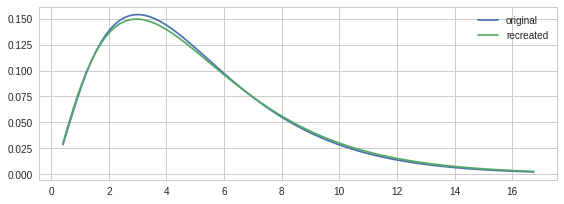

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax.plot(x, X.pdf(x), label="original")
ax.plot(x, Y.pdf(x), label="recreated")
ax.legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

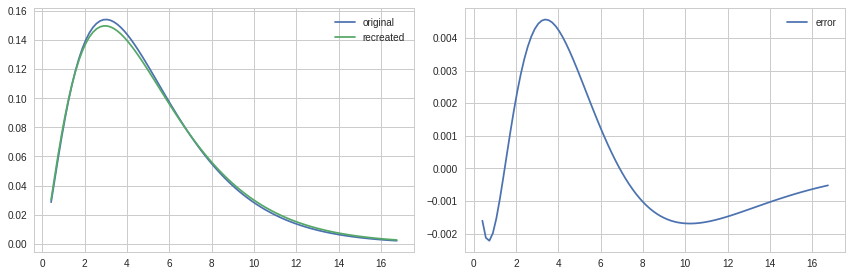

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

### Hypothesis testing
* null hypothesis (H0) == currently accepted state of knowledge
* alternative hypothesis (Ha) == challenges current state
![pic](pics/hypothesis-test-cases.png)

In [53]:
# example:
# null hypo = mean of population (u) is u0 = 1.0
np.random.seed(123456789)
mu, sigma = 1.0, 0.5
X = stats.norm(mu-0.2, sigma)

In [54]:
n = 100
X_samples = X.rvs(n)

In [55]:
# test statistic: z = (xbar-uo)/(sigma/sqrt(n))
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n))
z

-2.8338979550098298

In [56]:
# if population variance not known, can use sample stdev instead
t = (X_samples.mean() - mu)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-2.9680338545657845

In [57]:
# two-sided hypo test of signficance level 5% (2.5% per side) -- threshold is:
stats.norm().ppf(0.025)

-1.9599639845400545

In [58]:
# find pval for observed test stats using cdf(), *2 for two-sided loss
2 * stats.norm().cdf(-abs(z))

0.0045984013290753566

In [59]:
# if using t-distribution
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.0037586479674227209

In [60]:
t,p = stats.ttest_1samp(X_samples, mu)
t,p

(-2.9680338545657841, 0.0037586479674227209)

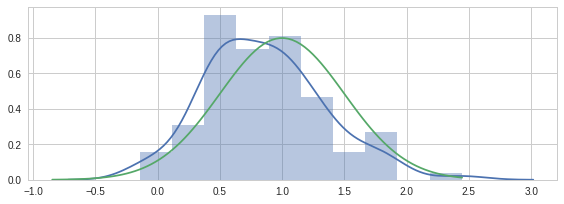

In [61]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()
fig.savefig("ch13-hypothesis-test-dist-sample-mean.pdf")

In [62]:
# ex: 2-varialbe problem
# null hypo: population means of two random vars are equal
n = 50
mu1, mu2 = np.random.rand(2)

In [63]:
X1        = stats.norm(mu1, sigma)
X2        = stats.norm(mu2, sigma)
X1_sample = X1.rvs(n)
X2_sample = X2.rvs(n)

In [64]:
# determine if samples provide enough evidence to prove mean1 <> mean2 (reject null hypo)
t,p = stats.ttest_ind(X1_sample, X2_sample)
t,p

(-1.4283175246005888, 0.15637981059673237)

In [65]:
# two population means are indeed different
mu1, mu2

(0.24764580637159606, 0.42145435527527897)

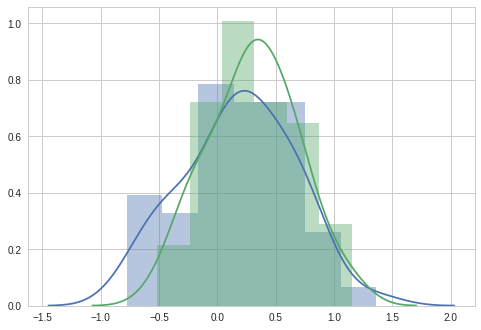

In [66]:
sns.distplot(X1_sample)
sns.distplot(X2_sample)

### Nonparameteric methods
* alternative way to build a model of an unknown distribution function: *kernel-density estimation (KDE)*. 
* key parameter: *bandwidth*. defines scale for influence of each term in sum. too big = featureless estimate; too small = too noisy.
* Multiple choices available for kernel functions - Gaussian (normal) == popular one.

In [67]:
np.random.seed(0)
X = stats.chi2(df=5)
X_samples = X.rvs(100)
X_samples[0:10]

array([ 11.87740141,   5.62133928,  12.48424465,   2.04604944,
         4.03651267,   5.65798023,   6.98206807,   4.70149541,
         5.77577501,   5.39173922])

In [68]:
# define KDE based on gaussian kernel

kde = stats.kde.gaussian_kde(X_samples)

In [69]:
# initial bandwidth setting
kde_low_bw = stats.kde.gaussian_kde(
    X_samples, 
    bw_method=0.25)
kde_low_bw

In [70]:
x = np.linspace(0, 20, 100)

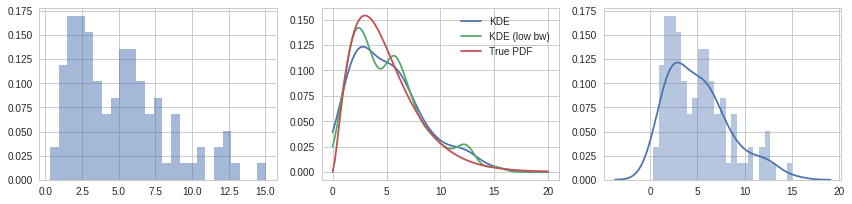

In [71]:
# plot using seaborn library distribution plot

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()
fig.savefig("ch13-hist-kde.pdf")

In [72]:
# given a KDE, use it to generate new random numbers
kde.resample(10)

array([[ 1.75376869,  0.5812183 ,  8.19080268,  1.38539326,  7.56980335,
         1.16144715,  3.07747215,  5.69498716,  1.25685068,  9.55169736]])

In [73]:
# indirect method for finding cume distr functions (CDF) or percent-point functs (PPT)
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

kde_cdf = np.vectorize(_kde_cdf)

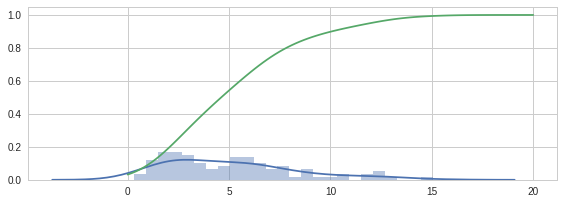

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.distplot(X_samples, bins=25, ax=ax)
x = np.linspace(0, 20, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()

In [75]:
def _kde_ppf(q):
    return optimize.fsolve(
        lambda x, q: kde_cdf(x) - q, 
        kde.dataset.mean(), 
        args=(q,))
[0]

kde_ppf = np.vectorize(_kde_ppf)

In [76]:
# 90% confidence interval
X.ppf([0.05, 0.95])

array([  1.14547623,  11.07049769])